# Model interpretation
Example use case of model interpretation:
- Clustering (find important clusters)
- Classification (build model to predict cluster membership)
- Interpretation of clusters (identify variables associated with cluster membership)

Other model interpretation applications:
- Regression models
- Other classification models

**Dataset used**
- iof_data.csv

In [ ]:
# Mount Google Drive and change directory 
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/ColabNotebooks/SACAC-EDA-2024/examples

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Clustering
from sklearn.cluster import MiniBatchKMeans
# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Interpretation   
from sklearn.tree import plot_tree       
from sklearn.inspection import permutation_importance, PartialDependenceDisplay   

In [2]:
# Import data set
fname = '../data/iof_data.csv' 
date_col = 'date'
df = pd.read_csv(fname,index_col=date_col,parse_dates=[date_col])

In [3]:
# Downsample
df = df.resample('3H').median()
df.dropna(inplace=True)

In [4]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
plant.feed.iron.comp,1344.0,56.281905,5.197293,42.740000,52.610000,56.020000,59.720000,65.780000
plant.feed.silica.comp,1344.0,14.665647,6.855702,1.310000,8.870000,13.940000,19.970000,33.400000
plant.flotation.sump01.starch.flow,1344.0,3028.980097,921.926069,224.754944,2288.806250,3162.592500,3678.597500,6157.575000
plant.flotation.sump01.amina.flow,1344.0,493.530681,78.543015,243.664751,445.109250,510.489250,550.828250,729.952017
plant.flotation.sump01.discharge.flow,1344.0,397.423363,8.624349,377.062355,399.318375,399.902000,400.339875,417.878414
plant.flotation.sump01.discharge.ph,1344.0,9.770622,0.361540,8.753414,9.558153,9.789568,10.021138,10.807284
plant.flotation.sump01.discharge.density,1344.0,1.684662,0.060586,1.519926,1.661695,1.699995,1.720026,1.814540
plant.flotation.bank01.column01.air.flow,1344.0,280.809869,29.250055,175.894875,250.107375,299.838500,299.928500,306.351000
plant.flotation.bank01.column02.air.flow,1344.0,277.789305,29.267984,178.365355,250.092375,299.687250,299.949625,307.963000
plant.flotation.bank01.column03.air.flow,1344.0,281.480802,28.130613,177.255174,249.988500,299.576250,299.787750,302.783000


<Axes: xlabel='date'>

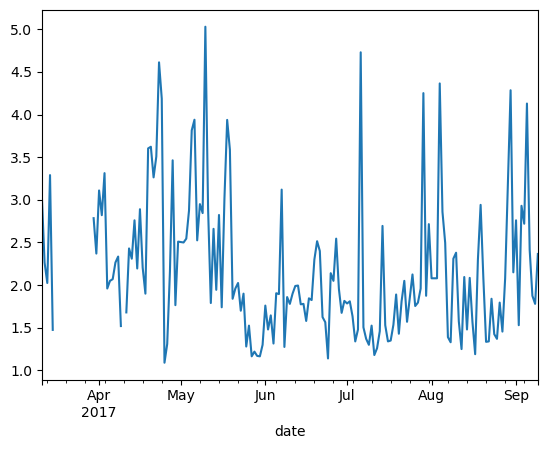

In [5]:
# Variable of interest: Product silica composition
df["plant.filters.product.silica.comp"].resample('24H').median().plot()

In [6]:
# Prepare data
input_keys = list(df.columns)
input_keys.remove('plant.filters.product.silica.comp')
input_keys.remove('plant.filters.product.iron.comp')
X = df[input_keys].copy()

In [7]:
# Scale input data
sx = StandardScaler()
X = sx.fit_transform(X)

In [8]:
# Dimension reduction of input data
pca = PCA(n_components=2)
T = pca.fit_transform(X)
df['PC1'] = T[:,0]
df['PC2'] = T[:,1]

In [9]:
# Clustering
n_clusters = 3
c = MiniBatchKMeans(n_clusters=n_clusters)
c.fit(T)
df['cluster'] = c.labels_

c:\Users\Lidia\miniconda3\envs\sim_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
c:\Users\Lidia\miniconda3\envs\sim_env\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Lidia\miniconda3\envs\sim_env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
c:\Users\Lidia\miniconda3\envs\sim_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, w

<Axes: xlabel='PC1', ylabel='PC2'>

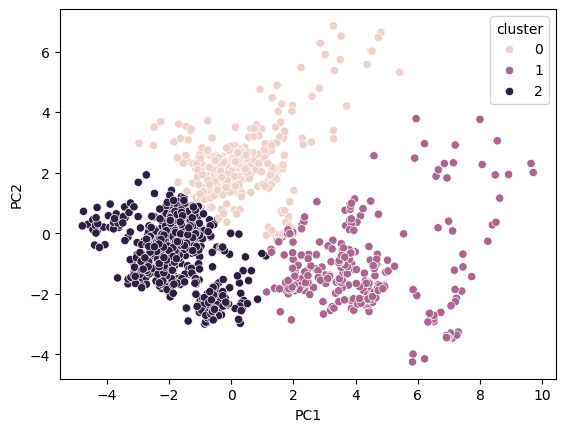

In [10]:
# Cluster visualization
fig, ax = plt.subplots()
sns.scatterplot(data=df,x='PC1',y='PC2',hue='cluster',ax=ax)

In [11]:
# Cluster statistics
df.groupby('cluster').mean().T

cluster,0,1,2
plant.feed.iron.comp,56.861448,56.212324,56.004741
plant.feed.silica.comp,14.029317,14.086937,15.238055
plant.flotation.sump01.starch.flow,3130.691469,2384.773192,3238.963380
plant.flotation.sump01.amina.flow,463.526567,479.916194,514.925523
plant.flotation.sump01.discharge.flow,396.845292,399.190631,397.005020
plant.flotation.sump01.discharge.ph,9.844749,9.599296,9.801639
plant.flotation.sump01.discharge.density,1.667013,1.699780,1.687783
plant.flotation.bank01.column01.air.flow,296.304164,238.550548,289.931967
plant.flotation.bank01.column02.air.flow,290.730373,238.778608,286.928508
plant.flotation.bank01.column03.air.flow,296.978628,239.933304,290.309743


In [12]:
# Cluster dataframe
Y = df['cluster'].copy()

In [13]:
# Train logistic regression model
lr = LogisticRegression()
lr.fit(X,Y)

LogisticRegression()

In [14]:
# Train decision tree model
t = DecisionTreeClassifier(max_depth=3)
t.fit(X,Y)

DecisionTreeClassifier(max_depth=3)

In [15]:
# Train random forest model
n_trees = 50
rf = RandomForestClassifier(n_estimators=n_trees)
rf.fit(X,Y)

RandomForestClassifier(n_estimators=50)

In [16]:
# Predict output variable 
Ypred_lr = lr.predict(X)
Ypred_t = t.predict(X)
Ypred_rf = rf.predict(X)

In [17]:
# Inspect model performance
# - Accuracy
acc_lr = accuracy_score(Y,Ypred_lr)
acc_t = accuracy_score(Y,Ypred_t)
acc_rf = accuracy_score(Y,Ypred_rf)

print(f'Accuracy of logistic regression: {acc_lr:.4f}')
print(f'Accuracy of tree: {acc_lr:.4f}')
print(f'Accuracy of random forest: {acc_lr:.4f}')


Accuracy of logistic regression: 0.9948
Accuracy of tree: 0.9948
Accuracy of random forest: 0.9948


In [18]:
# Logistic regression coefficients
lr_coef = pd.DataFrame(lr.coef_,columns=input_keys).T
lr_coef.index.name = 'Coefficient'
lr_coef

,0,1,2
Coefficient,,,
plant.feed.iron.comp,-0.172404,0.365995,-0.193592
plant.feed.silica.comp,0.419313,-0.729816,0.310503
plant.flotation.sump01.starch.flow,-0.009900,-0.864652,0.874552
plant.flotation.sump01.amina.flow,-0.569196,-0.339463,0.908659
plant.flotation.sump01.discharge.flow,-0.345694,0.267117,0.078576
plant.flotation.sump01.discharge.ph,0.318774,-0.478940,0.160166
plant.flotation.sump01.discharge.density,-0.439478,-0.026674,0.466152
plant.flotation.bank01.column01.air.flow,0.703060,-0.899827,0.196767
plant.flotation.bank01.column02.air.flow,0.421945,-0.716755,0.294809


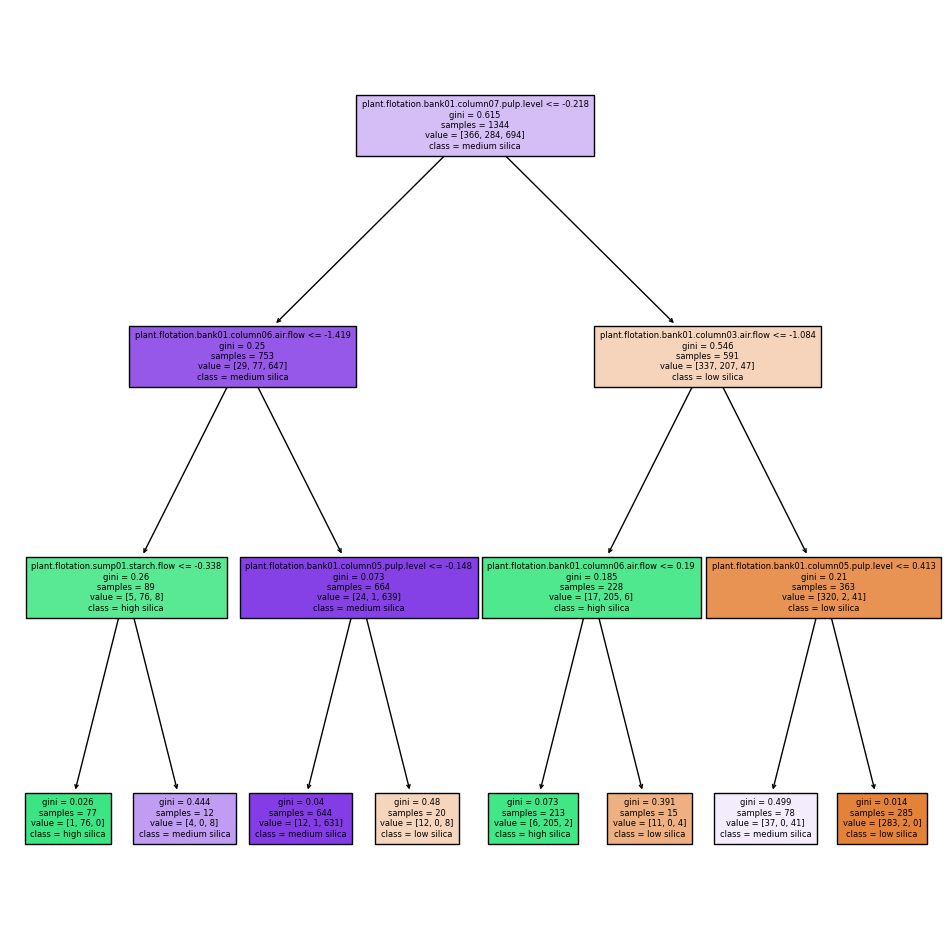

In [22]:
# Decision tree visualization
fig, ax = plt.subplots(figsize=(12,12))
_ = plot_tree(
    t,
    feature_names=input_keys,
    class_names=["low silica","high silica","medium silica"], # cluster labels, in ascending numerical order - UPDATE on each reclustering!
    filled=True,
    fontsize=6
)

Text(0, 0.5, 'Mean accuracy decrease')

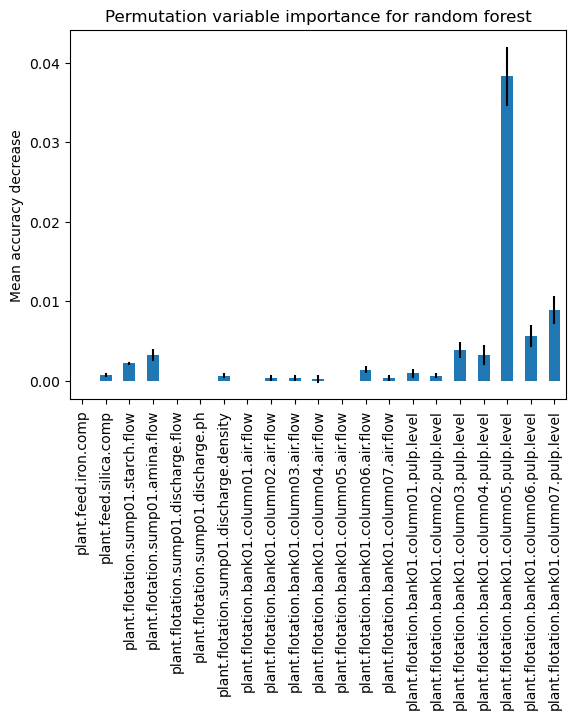

In [23]:
# Random forest variable importance
rfVIresult = permutation_importance(rf,X,Y,n_repeats=10)
rfVImean = pd.Series(rfVIresult.importances_mean,index=df[input_keys].columns)
fig, ax = plt.subplots()
rfVImean.plot.bar(yerr=rfVIresult.importances_std,ax=ax)
ax.set_title('Permutation variable importance for random forest')
ax.set_ylabel('Mean accuracy decrease')

Text(0.5, 0.98, 'Random forest: Partial Dependence')

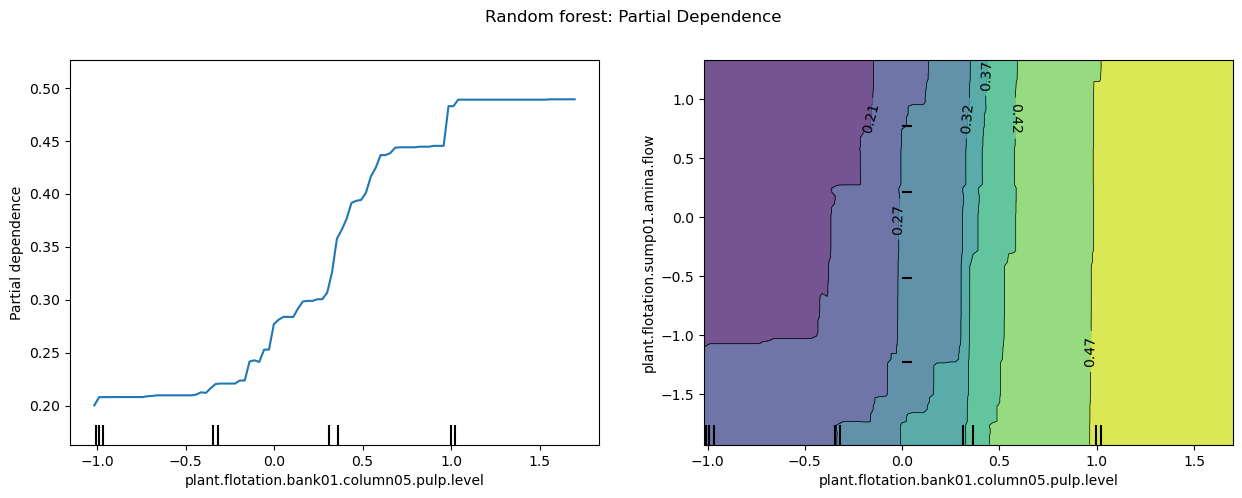

In [24]:
# Random forest partial dependence
fig, ax = plt.subplots(figsize=(15,5))
x1 = 'plant.flotation.bank01.column05.pulp.level'
x2 = 'plant.flotation.sump01.amina.flow'
PartialDependenceDisplay.from_estimator(
    estimator = rf,
    X = X,
    target=0, # class label to display partial dependence for - UPDATE on each reclustering!
    features = [x1,[x1,x2]],
    feature_names=input_keys,
    ax=ax
)
fig.suptitle('Random forest: Partial Dependence')